# Práctica Classical Neuronal Networks

* Alejandro Mayorga
* Fernando Mondragón


In [19]:
#Primer paso: Cargar la database y distribuir las imágenes de entrenamiento y evaluación

from tensorflow . keras . datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import layers


#A mayores, cargamos la librería responsable de representar nuestras gráficas

import matplotlib.pyplot as plt


( x_train , y_train ), ( x_test , y_test ) = fashion_mnist . load_data ()

In [20]:
#Primeramente, tenemos que preparar los datos de forma que sean fácilmente introducibles en nuestra red. Esto
#implica reorganizar el array original en el que se nos es dada la información, así como para su tipo de datos a
#float

train_images = x_train.reshape((60000, 28 * 28))
test_images = x_test.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255



In [21]:
#Creamos un tercer grupo de validación

validation_images = train_images[:10000] # Copy of x_train from the begining (0) to 9999
validation_labels = y_train[:10000]





train_images = train_images[10000:] # Copy of x_train from 10000 to the end
train_labels = y_train[10000:]

In [22]:
#Realizamos one-hot enconding para así disponer las etiquetas de forma que la red pueda entrenar

train_labels = to_categorical(train_labels)
validation_labels = to_categorical(validation_labels)
test_labels = to_categorical(y_test)


In [5]:
#Opciones a probar

epoch_n = [10,30]
batch_size_n = [32,512]

layers_n = [1,2]
neurons_n = [16,64,128]
learning_rates = [0.1,0.01,0.001]
optimizers = ["rmsprop","Adam"]



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


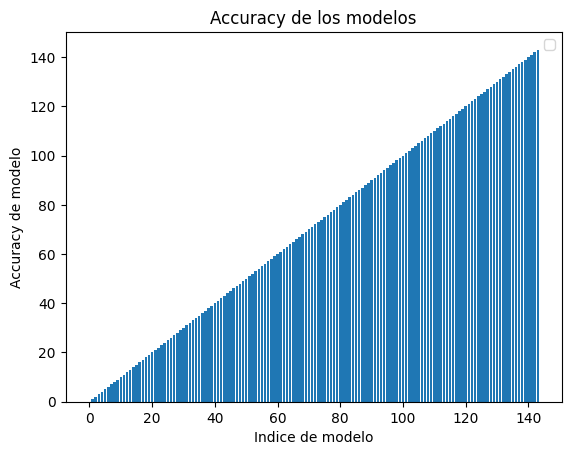

In [13]:


#Ahora loopeamos por los hiperparametros
#2*2*2*3*3*2 = 144 modelos. Aproximadamente 15s por modelo, aprox 40 min para probar todos


counter = 0
list_acc = []
list_opt = []
for epoch in epoch_n: #
    for batch in batch_size_n:#
        for capas in layers_n: # 
            for neurons in neurons_n: #
                for learning_r in learning_rates:
                    for optimizador in optimizers: #
                        model = keras.Sequential()

                        model.add(layers.Input(shape=(784, )))
                        for i in range(capas):
                            model.add(layers.Dense(neurons, activation="relu"))

                        model.add(layers.Dense(10, activation="softmax"))
                        
                        if optimizador =="rmsprop":
                            opt = keras.optimizers.RMSprop(learning_rate=learning_r)
                        if optimizador =="Adam":
                            opt = keras.optimizers.Adam(learning_rate=learning_r)
                        
                        model.compile(optimizer=opt, 
                                  loss="categorical_crossentropy",
                                  metrics=["accuracy"])

                        print(len(train_images), len(train_labels))
                        history =model.fit(train_images, train_labels, epochs=epoch,verbose=0, batch_size=batch, 
                            validation_data = (validation_images, validation_labels))
                        
                        history_dict = history.history
                        result_val = max(history_dict['val_accuracy'])
                        print()
                        
#Guardamos todos los modelos  if result[0]< result_val:
                        list_acc+=[result_val]
                                  
                        list_opt+= ["epoch: "+ str(epoch)+ "\n batch: " +str(batch)+ "\n layers: " 
                                    +str(layers)+ "\n neurons: " +str(neurons)]#+ "\n learning rate: " +str(learning rate) +" optimizador: " +optimizador]                      
                        counter +=1
                        print("counter:",counter)     





list_acc = range(144)

#Mostramos los resultados de las accuracies obtenidas para cada modelo


plt.bar(range(len(list_acc)), list_acc)

plt.title('Accuracy de los modelos')
plt.xlabel('Indice de modelo')
plt.ylabel('Accuracy de modelo')
plt.legend()
plt.show()




In [18]:
#Nos quedamos con los 5 mejores y peores modelos

cut = 5

list_acc = range(10)
list_opt = ["Hola", "que tal", "muy bien", "y tu", "jaja", "sadfads", "safas", "jaaaaaaa", "nueve", "diez"]

bottom = sorted(range(len(list_acc)), key=lambda i: list_acc[i], reverse=True)[-cut:]
top = sorted(range(len(list_acc)), key=lambda i: list_acc[i])[-cut:]



for x in range(cut):
    print("Top ", cut-x, " model: Accuracy = ", top[x], "options: ", list_opt[top[x]])
    
for y in range(cut):  
    print("Bottom ", cut-y, " model: Accuracy = ", bottom[y], "options: ", list_opt[bottom[y]])


#plt.bar(range(len(list_acc)), list_acc)
#plt.title('Accuracy de los modelos')
#plt.xlabel('Indice de modelo')
#plt.ylabel('Accuracy de modelo')
#plt.legend()
#plt.show()




Top  5  model: Accuracy =  5 options:  sadfads
Top  4  model: Accuracy =  6 options:  safas
Top  3  model: Accuracy =  7 options:  jaaaaaaa
Top  2  model: Accuracy =  8 options:  nueve
Top  1  model: Accuracy =  9 options:  diez
Bottom  5  model: Accuracy =  4 options:  jaja
Bottom  4  model: Accuracy =  3 options:  y tu
Bottom  3  model: Accuracy =  2 options:  muy bien
Bottom  2  model: Accuracy =  1 options:  que tal
Bottom  1  model: Accuracy =  0 options:  Hola


In [8]:



#Ahora ejecutamos el modelo sobre los datos de test para ver su accuracy real

#TODO Definir el modelo que mejor resultado de y reentrenarlo

#results = model.evaluate(x_test, y_test)

#print(results)

[5, 6, 7, 8, 9]


# REGULARIZACIÓN
Ahora vamos a probar algunos de los modelos anteriores utilizando las técnicas de regularización de "dropout" y "batch normalization" para tratar de obtener mejores resultados.

## Dropout

In [ ]:
#dropout

#Definir modelo y para implementar el dropout, añadir las capas de Dropout

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()


#Ejecutar 3 o 4 modelos entre los que esté el mejor obtenido anteriormente

### Resultados del dropout

## Batch normalization

In [ ]:
#batch normalization

#Similarmente al caso anterior, implementamos la batch regularization añadiendo capas intermedias de regularización
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.BatchNormalization())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()
#Ejecutar 3 o 4 modelos entre los que esté el mejor obtenido anteriormente

### Resultados de la batch normalization